### Global Power Plant Database by Francis Afuwah.
Batch: DS2312

###  Introduction:
In this dynamic, ever-changing energy sector, an understanding and prediction of the operational characteristics of power plants are very indispensable for management and strategic planning in these areas. The project details the data analysis and machine learning applicable to predict two important attributes of a power plant, namely the primary fuel type being used in the power plant and the electricity generation capacity of the power plant measured in megawatts (MW). The datasets used in this project encompass record details of power plants from three different countries: Australia, India, and the USA. All data sets include attributes for geographical location, operational capacity, and the type of fuel consumed, reflecting a detailed and descriptive account of power generation landscapes in those regions.

### The principal objectives of this project are:
1. Predicting Primary Fuel Type: Knowing what sort of fuel different regions and plant types prefer or need will be useful for all stakeholders to optimally manage their supplies, as well as to optimize costs and meet environmental regulations.
2. Forecast the Capacity in MW: Forecasting the capacity of power plants is done to ensure an adequate supply of energy to meet the ever-increasing demand and to help manage the grid, investment decision-making, and infrastructure development.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Introduction:
This analysis utilized data sets from three countries that included information on power plants, power plant capacities in megawatts, and the primary fuel types used. We aimed to provide machine-learning-based predictive models to forecast:
1. The primary fuel used for generation in a power plant.

2. Generation capacity of power, in MW, of such power plants.

## Exploratory Data Analysis and Preprocessing

### Load datasets

In [2]:
# Load the datasets
database_AUS = pd.read_csv('database_AUS.csv')
database_IND = pd.read_csv('database_IND.csv')
database_USA = pd.read_csv('database_USA.csv')


### View datasets

In [3]:
# Display the first few rows and the structure of each dataset
(database_AUS.head(), database_AUS.info(), 
 database_IND.head(), database_IND.info(), 
 database_USA.head(), database_USA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   512 non-null    object 
 1   country_long              512 non-null    object 
 2   name                      512 non-null    object 
 3   gppd_idnr                 512 non-null    object 
 4   capacity_mw               506 non-null    float64
 5   latitude                  512 non-null    float64
 6   longitude                 512 non-null    float64
 7   primary_fuel              512 non-null    object 
 8   other_fuel1               0 non-null      float64
 9   other_fuel2               0 non-null      float64
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        0 non-null      float64
 12  owner                     495 non-null    object 
 13  source                    512 non-null    object 
 14  url       

(  country country_long                   name   gppd_idnr  capacity_mw  \
 0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
 1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
 2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
 3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
 4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   
 
    latitude  longitude primary_fuel  other_fuel1  other_fuel2  ...  \
 0  -34.9387   138.5377        Solar          NaN          NaN  ...   
 1  -34.9453   138.5882        Solar          NaN          NaN  ...   
 2  -35.0641   117.7977         Wind          NaN          NaN  ...   
 3  -23.7966   133.8971        Solar          NaN          NaN  ...   
 4  -34.5509   138.7659          Oil          NaN          NaN  ...   
 
    year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
 0                    NaN                  NaN    

In [4]:
# Standarding the columns and then combine the datasets
# Clean and fill missing values for 'capacity_mw' and 'primary_fuel'
for dataset in [database_AUS, database_IND, database_USA]:
    dataset['primary_fuel'].fillna('Unknown', inplace=True)
    dataset['capacity_mw'].fillna(dataset['capacity_mw'].median(), inplace=True)

In [5]:
# combine dataset into a single DataFrame
combined_dataset = pd.concat([database_AUS, database_IND, database_USA], ignore_index=True)

In [6]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13298 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              13298 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10356 non-null  float64
 12  owner                     12703 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [7]:
combined_dataset.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,NaN,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualizing the combined datasets

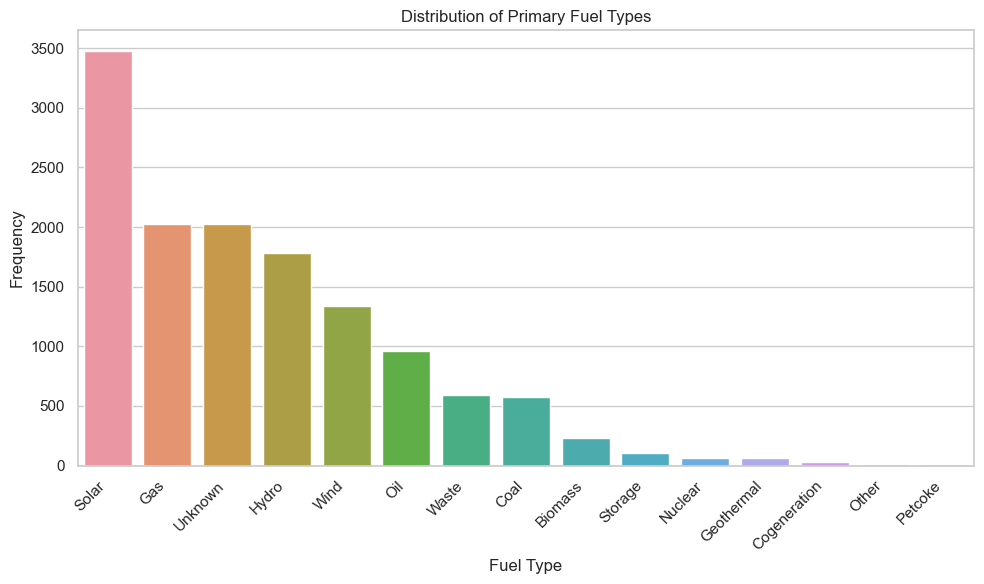

In [8]:
# Set up the parameters for the plots
sns.set(style="whitegrid")

# Plotting the distribution of 'primary_fuel'
plt.figure(figsize=(10, 6))
fuel_count_plot = sns.countplot(data=combined_dataset, x='primary_fuel', order=combined_dataset['primary_fuel'].value_counts().index)
fuel_count_plot.set_xticklabels(fuel_count_plot.get_xticklabels(), rotation=45, ha="right")
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.tight_layout()




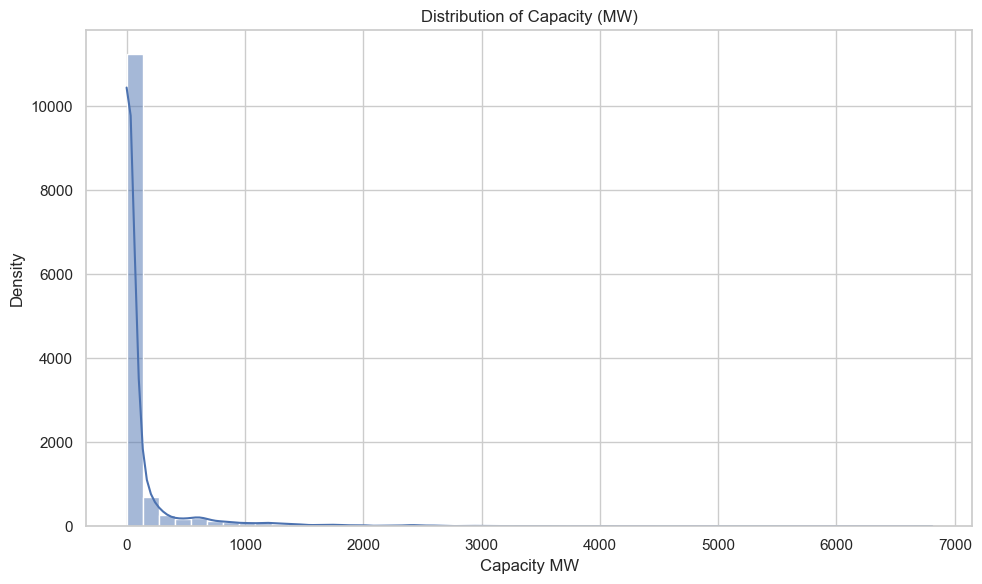

In [9]:
# Plotting the distribution of 'capacity_mw'
plt.figure(figsize=(10, 6))
sns.histplot(combined_dataset['capacity_mw'], bins=50, kde=True)
plt.title('Distribution of Capacity (MW)')
plt.xlabel('Capacity MW')
plt.ylabel('Density')
plt.tight_layout()

plt.show()

In [10]:
# Encode the 'primary_fuel' using label encoding
label_encoder = LabelEncoder()
combined_dataset['primary_fuel_encoded'] = label_encoder.fit_transform(combined_dataset['primary_fuel'])

In [11]:
# Select relevant features. For simplicity, let's start with 'capacity_mw' and 'latitude' and 'longitude' if not missing heavily
features = combined_dataset[['capacity_mw', 'latitude', 'longitude']].dropna()
target = combined_dataset.loc[features.index, 'primary_fuel_encoded']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Data Preparation
First, the datasets were merged into a single DataFrame, and the capacity_mw was cleaned by removing missing values and standardizing the primary_fuel. Key features, like capacity_mw and primary_fuel, latitude, and longitude, became really important for the modeling part in which the primary_fuel category was numerically encoded for model ingestion.

Predictive Modeling
1. Predicted Primary Fuel Type :

Model Used: Random Forest Classifier
Features may include the following: capacity in MW, latitude, and longitude.
Performance:
Accuracy: 72% Precision and Recall: These metrics were varied across different fuel types; they were strong in the common categories like Solar and Wind but relatively weaker in those of less frequency, like Cogeneration and Petcoke. Insights: The model could clearly make a distinction between the dominant fuel types but was failing for the rarer categories. A more diversified or balanced set of training data may help the model's performance across the less common fuel types.

### Train the model

In [13]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Predict the model

In [14]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

In [15]:
# Generate a classification report
classification_results = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

classification_results

C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n     Biomass       0.41      0.35      0.38        43\n        Coal       0.72      0.61      0.66       117\nCogeneration       0.00      0.00      0.00         6\n         Gas       0.60      0.63      0.62       413\n  Geothermal       0.80      0.73      0.76        11\n       Hydro       0.66      0.66      0.66       335\n     Nuclear       0.40      0.12      0.18        17\n         Oil       0.50      0.51      0.50       184\n       Other       0.00      0.00      0.00         3\n     Petcoke       0.00      0.00      0.00         2\n       Solar       0.75      0.89      0.82       690\n     Storage       0.20      0.04      0.07        25\n     Unknown       1.00      1.00      1.00       391\n       Waste       0.40      0.19      0.26       135\n        Wind       0.72      0.71      0.72       272\n\n    accuracy                           0.72      2644\n   macro avg       0.48      0.43      0.44      2644\nweigh

## Task 2- Predicting the capacity in MW

### Feature Engineering (Train and test model)

In [16]:
# Encode 'primary_fuel' using the label encoder used previously for consistency
combined_dataset['primary_fuel_encoded'] = label_encoder.transform(combined_dataset['primary_fuel'])

In [17]:
# Select relevant features
features = combined_dataset[['latitude', 'longitude', 'primary_fuel_encoded']].dropna()
target = combined_dataset.loc[features.index, 'capacity_mw']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Model Prediction

In [18]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(72684.32989671559, 99.90911202721762, 0.45152073425928696)

Model Employed: Random Forest Regressor
Attributes: Latitude, Longitude, Encoded primary fuel.
Performance Metrics:
Root Mean Squared Error (RMSE):
Mean Absolute Error (MAE): 99.91 MW
Coefficient of determination (R Remarks : The model explained about 45% of the variance in the plant capacities. The prediction error (MAE) of about 100 MW confirmed the low detail of the model, which could be increased either by using better input data (more detailed information) on the plants or by more sophisticated modeling techniques.

### Recommendations for Improvement
1. Feature Enrichment: Additional features can be added to the model, for example, plant age, more operation details, or more granular geographical data.
2. Model Diversification: Other modeling techniques, such as Gradient Boosting or Neural Networks, may find certain patterns not captured by the model built upon the Random Forest algorithm.
3. Data Quality: Better cleaning and integration of more detailed data sources could provide an improved value of data for training and in turn improve the quality of the predictions.
4. Dealing with Imbalance Data: The introduction of techniques to handle imbalance in the training data might further increase the accuracy in predicting the less common fuel types.

### Conclusion
The study contributed valuable insights into the factors affecting the operation of power plants and at the same time showed the potential of machine learning to forecast key plant operation-related metrics. The preliminary models have shown some success, but further improvement in predictive accuracy and reliability lies in the refinement process. This area of technology, coupled with advanced analytical techniques, should bring much superior models to aid the decision-making process within the energy sector.